# Keras TF 2.0 - Proyecto de Calificación

Exploremos una tarea de clasificación con Keras API para TF 2.0

## Los datos

### Cancer de seno wisconsin (diagnostico) dataset
--------------------------------------------

**Caracteristicas del Dataset:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

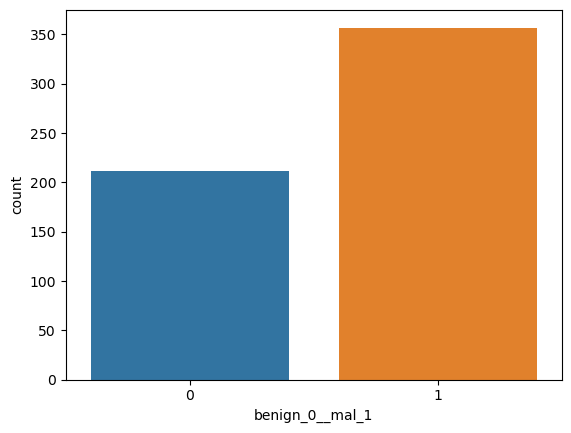

In [6]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

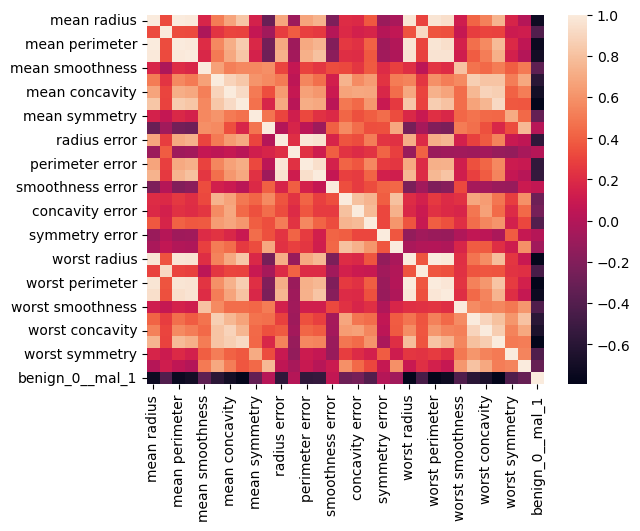

In [7]:
sns.heatmap(df.corr())

In [8]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

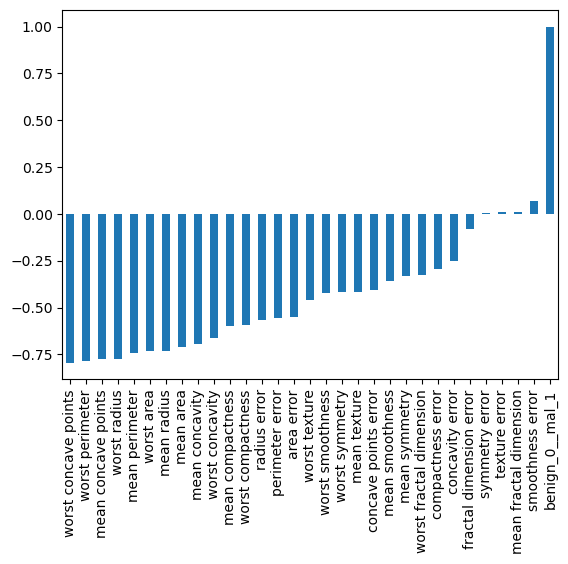

In [9]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

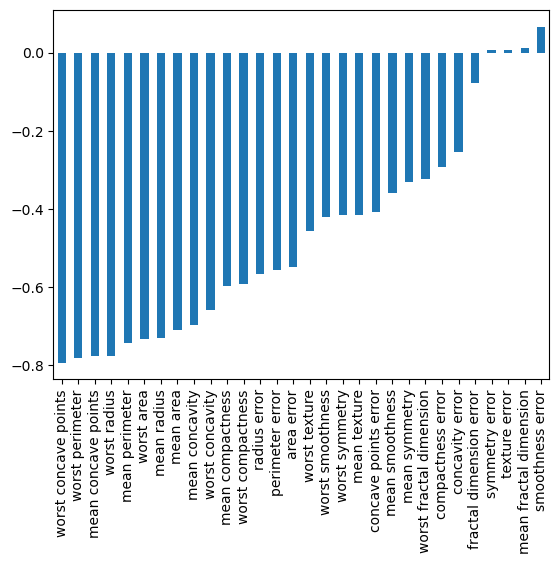

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## División entrenamiento y prueba

In [11]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=101)


## Escalando datos

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler()

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creando el modelo

    # Para problemas de clasificación
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model = Sequential()

#capa de entrada con la cantidad de variables predictivas
model.add(Dense(units=30,activation='relu'))

#capa oculta
model.add(Dense(units=15,activation='relu'))

#capa de salida
model.add(Dense(units=1,activation='sigmoid'))

# para problemas de clasificacion binaria
model.compile(loss='binary_crossentropy', optimizer='adam')

## Entrenamiento del modelo

### Ejemplo uno: ¡Elegir demasiadas epochs y sobreajustar!

In [21]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), 
          verbose=1
          )

Epoch 1/600
14/14 [==============================] - 2s 33ms/step - loss: 0.6898 - val_loss: 0.6733
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6548 - val_loss: 0.6383
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6203 - val_loss: 0.5999
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5771 - val_loss: 0.5548
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5349 - val_loss: 0.5132
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4896 - val_loss: 0.4653
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4455 - val_loss: 0.4196
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3987 - val_loss: 0.3721
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3587 - val_loss: 0.3332
Epoch 10/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3221 - val_loss: 0.2981
Epoch 1

Epoch 83/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0580 - val_loss: 0.1161
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0519 - val_loss: 0.1063
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0569 - val_loss: 0.1146
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0528 - val_loss: 0.1152
Epoch 87/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0545 - val_loss: 0.1157
Epoch 88/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0509 - val_loss: 0.1175
Epoch 89/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0524 - val_loss: 0.1153
Epoch 90/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0539 - val_loss: 0.1170
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0531 - val_loss: 0.1104
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0542 - val_loss: 0.1159


14/14 [==============================] - 0s 5ms/step - loss: 0.0470 - val_loss: 0.1398
Epoch 165/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0479 - val_loss: 0.1360
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0418 - val_loss: 0.1289
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0425 - val_loss: 0.1304
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0407 - val_loss: 0.1347
Epoch 169/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0421 - val_loss: 0.1371
Epoch 170/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0409 - val_loss: 0.1365
Epoch 171/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0422 - val_loss: 0.1295
Epoch 172/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0418 - val_loss: 0.1408
Epoch 173/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0410 - val_loss: 0.1344
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0352 - val_loss: 0.1607
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0357 - val_loss: 0.1577
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0345 - val_loss: 0.1420
Epoch 248/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0355 - val_loss: 0.1560
Epoch 249/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0341 - val_loss: 0.1563
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0334 - val_loss: 0.1503
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0345 - val_loss: 0.1587
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0348 - val_loss: 0.1584
Epoch 253/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0373 - val_loss: 0.1503
Epoch 254/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0374 - val_loss: 0.1647
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0276 - val_loss: 0.1776
Epoch 327/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0283 - val_loss: 0.1724
Epoch 328/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0274 - val_loss: 0.1808
Epoch 329/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0291 - val_loss: 0.1823
Epoch 330/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0273 - val_loss: 0.1688
Epoch 331/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0283 - val_loss: 0.1846
Epoch 332/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0268 - val_loss: 0.1747
Epoch 333/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0307 - val_loss: 0.1700
Epoch 334/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0295 - val_loss: 0.1944
Epoch 335/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0286 - val_loss: 0.1830
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0219 - val_loss: 0.2186
Epoch 408/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0234 - val_loss: 0.1916
Epoch 409/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0219 - val_loss: 0.2185
Epoch 410/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0222 - val_loss: 0.1940
Epoch 411/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0213 - val_loss: 0.2168
Epoch 412/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0227 - val_loss: 0.1897
Epoch 413/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.2111
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0218 - val_loss: 0.2124
Epoch 415/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0219 - val_loss: 0.2118
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0214 - val_loss: 0.2167
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.0166 - val_loss: 0.2426
Epoch 489/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0206 - val_loss: 0.2045
Epoch 490/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0183 - val_loss: 0.2077
Epoch 491/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0162 - val_loss: 0.2221
Epoch 492/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0165 - val_loss: 0.2186
Epoch 493/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0160 - val_loss: 0.2268
Epoch 494/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0160 - val_loss: 0.2244
Epoch 495/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0156 - val_loss: 0.2263
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0156 - val_loss: 0.2172
Epoch 497/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0154 - val_loss: 0.2257
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0119 - val_loss: 0.2493
Epoch 570/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0123 - val_loss: 0.2404
Epoch 571/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0115 - val_loss: 0.2829
Epoch 572/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0145 - val_loss: 0.2386
Epoch 573/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0128 - val_loss: 0.2566
Epoch 574/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0118 - val_loss: 0.2482
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0121 - val_loss: 0.2820
Epoch 576/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0135 - val_loss: 0.2185
Epoch 577/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0158 - val_loss: 0.2905
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0135 - val_loss: 0.2404
Epoc

In [22]:
# model.history.history

In [23]:
model_loss = pd.DataFrame(model.history.history)

In [24]:
# model_loss

<AxesSubplot:>

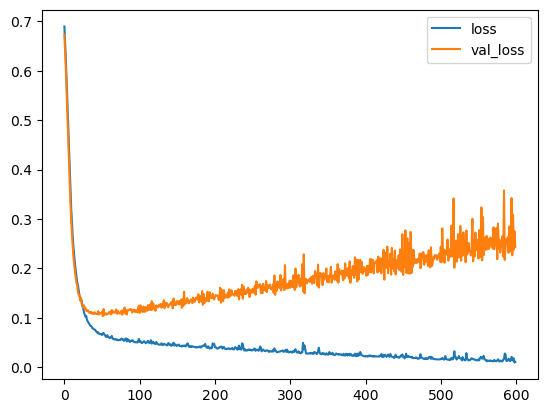

In [25]:
model_loss.plot()

## Ejemplo dos: Detención anticipada (Early Stopping)

¡Obviamente entrenamos demasiado! ¡Utilicemos la detención temprana para rastrear val_loss y detener el entrenamiento una vez que comience a aumentar demasiado!

La detención anticipada es una técnica de optimización utilizada para reducir el sobreajuste sin comprometer la precisión del modelo. La idea principal detrás de la interrupción temprana es detener el entrenamiento antes de que un modelo comience a sobreajustarse.

En el aprendizaje automático, la parada anticipada es una forma de regularización que se utiliza para evitar el sobreajuste cuando se entrena a un modelo con un método iterativo, como el descenso de gradiente. Dichos métodos actualizan al modelo para que se ajuste mejor a los datos de entrenamiento con cada iteración. Hasta cierto punto, esto mejora el rendimiento del modelo en datos fuera del conjunto de entrenamiento. Más allá de ese punto, sin embargo, mejorar el ajuste del modelo a los datos de entrenamiento se produce a expensas de un mayor error de generalización. Las reglas de detención temprana brindan orientación sobre cuántas iteraciones se pueden ejecutar antes de que el modelo comience a sobreajustarse. Las reglas de detención temprana se han empleado en muchos métodos diferentes de aprendizaje automático, con cantidades variables de base teórica.

In [26]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

Deje de entrenar cuando una cantidad monitoreada haya dejado de mejorar.

    Argumentos:
        
        monitor: Cantidad a monitorear.
        
        min_delta: Cambio mínimo en la cantidad monitoreada
            para calificar como una mejora, es decir, un valor absoluto de
            cambio de menos de min_delta, contará como no
            mejora.
        
        patience: Número de epochs sin mejora
            después de lo cual se detendrá el entrenamiento.
        
        verbose: verbosity mode.
        
        mode: Uno de `{"auto", "min", "max"}`. En el modo `min`,
            el entrenamiento se detendrá cuando la cantidad
            monitoreado ha dejado de disminuir; en `máximo`
            modo se detendrá cuando la cantidad
            monitoreado ha dejado de aumentar; en 'automático'
            , la dirección se infiere automáticamente
            del nombre de la cantidad supervisada.

In [28]:
# patience: cuantas epocas sin mejora va a esperar para parar entrenamiento

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [29]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), 
          verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6703 - val_loss: 0.6587
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6436 - val_loss: 0.6316
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6155 - val_loss: 0.6018
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5841 - val_loss: 0.5692
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5489 - val_loss: 0.5299
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5060 - val_loss: 0.4845
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4602 - val_loss: 0.4346
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4125 - val_loss: 0.3855
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3674 - val_loss: 0.3427
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3320 - val_loss: 0.3092
Epoch 11

<AxesSubplot:>

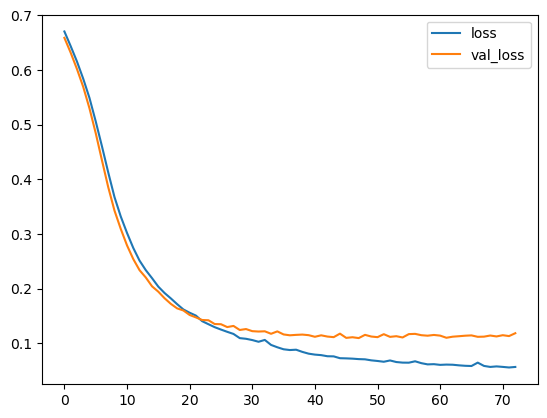

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Ejemplo tres: agregar capas de abandono (DropoutLayers)

Dilución (también conocido como Dropout) es una técnica de regularización para reducir el sobreajuste en redes neuronales artificiales. Es una forma eficiente de realizar promedios de modelos con redes neuronales. El término dropout significa "abandonar" u omitir aleatoriamente neuronas(tanto ocultas como visibles) durante el proceso de entrenamiento de una red neuronal. Tanto la reducción de los pesos como omitir unidades obtienen el mismo tipo de regularización.

La capa Dropout establece aleatoriamente las unidades de entrada en 0 con una frecuencia de tasa en cada paso durante el tiempo de entrenamiento, lo que ayuda a evitar el sobreajuste. Las entradas que no se establecen en 0 se escalan en 1/(1 - tasa) de modo que la suma de todas las entradas no cambia.

In [31]:
from tensorflow.keras.layers import Dropout

In [32]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [33]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 2s 20ms/step - loss: 0.7803 - val_loss: 0.7023
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.7218 - val_loss: 0.6815
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6980 - val_loss: 0.6680
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6672 - val_loss: 0.6565
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6765 - val_loss: 0.6438
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6388 - val_loss: 0.6296
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6319 - val_loss: 0.6139
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5984 - val_loss: 0.5938
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5987 - val_loss: 0.5660
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6021 - val_loss: 0.5437
Epoch 11

14/14 [==============================] - 0s 6ms/step - loss: 0.1231 - val_loss: 0.0803
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1251 - val_loss: 0.0824
Epoch 85/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1294 - val_loss: 0.0789
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1427 - val_loss: 0.0781
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1249 - val_loss: 0.0805
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1126 - val_loss: 0.0738
Epoch 89/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1215 - val_loss: 0.0770
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1115 - val_loss: 0.0770
Epoch 91/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1020 - val_loss: 0.0873
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1019 - val_loss: 0.0810
Epoch 93/600


14/14 [==============================] - 0s 6ms/step - loss: 0.0833 - val_loss: 0.0804
Epoch 165/600
14/14 [==============================] - 0s 5ms/step - loss: 0.1118 - val_loss: 0.0834
Epoch 166/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0881 - val_loss: 0.0936
Epoch 167/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0909 - val_loss: 0.0607
Epoch 168/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0889 - val_loss: 0.0815
Epoch 169/600
14/14 [==============================] - 0s 6ms/step - loss: 0.1072 - val_loss: 0.0792
Epoch 170/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0967 - val_loss: 0.0653
Epoch 171/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0760 - val_loss: 0.0744
Epoch 172/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0816 - val_loss: 0.0809
Epoch 173/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0740 - val_loss: 0.0672
Epoc

<AxesSubplot:>

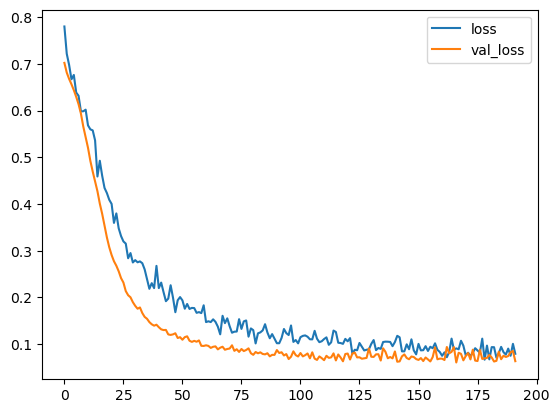

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Evaluacion del modelo

In [35]:
predictions = model.predict(X_test)

5/5 [==============================] - 0s 0s/step


In [36]:
predictions

array([[9.91821289e-01],
       [9.92408752e-01],
       [9.94984031e-01],
       [1.27979566e-03],
       [9.98645127e-01],
       [9.98844385e-01],
       [9.99311566e-01],
       [1.64311550e-10],
       [9.97355402e-01],
       [9.97785032e-01],
       [3.52139505e-05],
       [9.95730102e-01],
       [9.72409964e-01],
       [9.98595059e-01],
       [1.50287888e-05],
       [9.99296665e-01],
       [9.90049660e-01],
       [9.97063398e-01],
       [1.97380431e-10],
       [3.37406993e-02],
       [9.86364841e-01],
       [9.97036517e-01],
       [9.89898384e-01],
       [9.98639166e-01],
       [4.59011586e-04],
       [9.59759653e-01],
       [1.67345081e-06],
       [9.99695122e-01],
       [1.02441720e-06],
       [1.18138109e-04],
       [5.34463644e-01],
       [1.43392579e-04],
       [8.19693148e-01],
       [7.65798017e-02],
       [9.98832166e-01],
       [9.98681188e-01],
       [2.33695609e-03],
       [7.04751676e-03],
       [5.02452565e-07],
       [1.26631053e-10],


In [37]:
y_test

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [38]:
predictions_y = np.where(predictions>0.5,1,0)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(classification_report(y_test,predictions_y))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [41]:
print(confusion_matrix(y_test,predictions_y))

[[54  1]
 [ 1 87]]
